## House pricing

We are using house sale price data from King County, Wahington, USA. This dataset is in public domain and can be obtained from Kaggle: https://www.kaggle.com/harlfoxem/housesalesprediction

Alternatively, from here: https://github.com/dbendet/coursera_machine_learning/blob/master/kc_house_data.csv

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Loading data

As always in Data Science we are starting with making nice cup of tea (or coffee), next move is to load the data:

- Start with loading `house_data.csv` file using `pd.read_csv()` function. Store the loaded data in the `data` variable


In [0]:
# Load the data

data = pd.read_csv('kc_house_data.csv')

In [3]:
# Observe top 10 observations

data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
# Observe last 10 observations

data.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [0]:
# Increase maximal displayed columns

pd.options.display.max_columns = 30

In [6]:
# Observe top 10 observations again

data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
# That's an an example of graded cell.
# Important: the name of the variable should be exactly the same as prefilled one 
# [Graded] Create a variable containing all the columns/features names

data_columns = data.columns

print(data_columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [0]:
# Grading

In [9]:
# [Graded] Create a variable containing the shape of the data matrix

data_shape = data.shape

print(data_shape)

(21613, 21)


In [0]:
# Grading

### 2. Simple statistics

Lets do some basics:
- Count number of not NaN's in every column.
- Is there any missing values in the data?
- Count number of unique values in every column. 
- What does this tell you about the features, which are most likely categorical and which are most likely numerical?
- Use pandas `.describe()` to display basic statistic about the data.
- Could you spot any sucpicious columns?

In [11]:
# Count number of not NaN's in every column

print(data.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [12]:
# [Graded] How many columns have missing values in them?

n_missing = 0

print(n_missing)

# your code here

0


In [0]:
# Grading


In [13]:
# Count number of unique values in every column

data_nunique_dict = data.nunique().to_dict()
print(data_nunique_dict)

{'id': 21436, 'date': 372, 'price': 4028, 'bedrooms': 13, 'bathrooms': 30, 'sqft_living': 1038, 'sqft_lot': 9782, 'floors': 6, 'waterfront': 2, 'view': 5, 'condition': 5, 'grade': 12, 'sqft_above': 946, 'sqft_basement': 306, 'yr_built': 116, 'yr_renovated': 70, 'zipcode': 70, 'lat': 5034, 'long': 752, 'sqft_living15': 777, 'sqft_lot15': 8689}


In [14]:
# [Graded] What feature has the lowest number of unique values?

n_unique_min = min(data_nunique_dict, key=data_nunique_dict.get)

print(n_unique_min)
print(type(n_unique_min))

waterfront
<class 'str'>


In [0]:
# Grading

In [16]:
# Display basic data statistics

data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
# Waterfront, view and condition seems like to be categorical. Zipcode is really suspucious column

### 3. Not so simple statistics

You have heard that **correlation** has something to do with feature predictiveness or, not?
Any way you decided to print correlation between every column in your data:

- Create a table of pairwise correlations between columns. Store it in the `correlation` variable
- What could you say about size of this table?
- Is there any missing columns? Why?
- Which features are mostly correlated with the `price`?


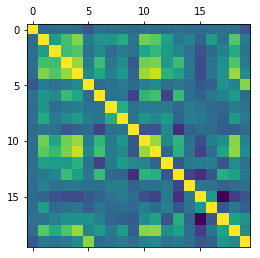

<class 'tuple'>


In [17]:
# Create a correlation matrix

corr = data.corr()
plt.matshow(corr)
plt.show()
print(type(corr.shape))

In [18]:
# [Graded] What is the shape of the correlation matrix? Output a list or a tuple containing it's dimensions

correlation_shape = corr.shape

print(correlation_shape)
print(type(correlation_shape))

(20, 20)
<class 'tuple'>


In [0]:
# Grading


In [19]:
# Print its columns

corr.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [20]:
# Print columns of the original data, what's missing, why?

data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [21]:
# [Graded] Provide the name of the missing column

missing_list = [number for number in data.columns if number not in corr.columns]

missing_column = ''.join(missing_list)

print(missing_column)

print(type(missing_column))

date
<class 'str'>


In [0]:
# Grading

In [23]:
# Print correlation table, elaborate on price correlated features

corr_on_price = data.corrwith(data.price)

print(corr_on_price)

corr_on_price_dict = corr_on_price.to_dict()

#It seems like 5 features have strong correlation with price (correlation more like 0.5). So let's drop price column from correlation and find max correlation feature with price

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
dtype: float64


In [24]:
corr_on_price_dict

{'bathrooms': 0.525137505413962,
 'bedrooms': 0.308349598145638,
 'condition': 0.03636178912899747,
 'floors': 0.2567938875507184,
 'grade': 0.6674342560202365,
 'id': -0.01676219661444511,
 'lat': 0.3070034799952186,
 'long': 0.02162624103930587,
 'price': 0.9999999999999999,
 'sqft_above': 0.6055672983560781,
 'sqft_basement': 0.3238160207119833,
 'sqft_living': 0.7020350546118003,
 'sqft_living15': 0.5853789035795679,
 'sqft_lot': 0.08966086058710017,
 'sqft_lot15': 0.08244715251948599,
 'view': 0.39729348829450495,
 'waterfront': 0.26636943403060226,
 'yr_built': 0.05401153149479269,
 'yr_renovated': 0.12643379344089314,
 'zipcode': -0.05320285429832562}

In [25]:
def removekey(d, key):
    r = dict(d)
    del r[key]
    return r
  
corr_on_price_dict = removekey(corr_on_price_dict, 'price')
corr_on_price_dict

{'bathrooms': 0.525137505413962,
 'bedrooms': 0.308349598145638,
 'condition': 0.03636178912899747,
 'floors': 0.2567938875507184,
 'grade': 0.6674342560202365,
 'id': -0.01676219661444511,
 'lat': 0.3070034799952186,
 'long': 0.02162624103930587,
 'sqft_above': 0.6055672983560781,
 'sqft_basement': 0.3238160207119833,
 'sqft_living': 0.7020350546118003,
 'sqft_living15': 0.5853789035795679,
 'sqft_lot': 0.08966086058710017,
 'sqft_lot15': 0.08244715251948599,
 'view': 0.39729348829450495,
 'waterfront': 0.26636943403060226,
 'yr_built': 0.05401153149479269,
 'yr_renovated': 0.12643379344089314,
 'zipcode': -0.05320285429832562}

In [26]:
# [Graded] Output the name of the feature that has the highest correlation with 'price'

highest_corr = max(corr_on_price_dict, key=corr_on_price_dict.get)

print(highest_corr)
print(type(highest_corr))


sqft_living
<class 'str'>


In [0]:
# Grading

### 4. Data cleaning

For your basic analysis you decide not to use column `zipcode`. You also decided to set column `id` as your data index:
- Drop column `zipcode`
- Set column `id` to be your data index


In [28]:
# your code here
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [0]:
# [Graded] drop column zipcode

data = data.drop("zipcode", axis=1)

In [0]:
# [Graded] set data index

data.set_index('id', inplace = True)

In [31]:
# Display top 10 observation from your data

data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819
2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711
2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113


In [0]:
# Grading

### 5. Basic date processing

You figure out that column `date` is to harsh for you, so you decided to convert it to plausible format:

- Use pandas method `to_datetime()` to convert the date to a good format.
- Exctract `year`, `month`, `day` and `weekday` from your new date column. Save them to separete columns.
- How many columns has your data now?
- Drop column `date`.

**Offtop** Very often date could be a ridiculously rich feature, sometimes it is holidays that matters,

sometimes weekends, sometimes some special days like **black friday**. Learn how to work with date in Python!

In [33]:
# Convert date to datetime format

data['date']= pd.to_datetime(data['date'], format ='%Y%m%dT%H%M%S')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [0]:
# Extract and store year

data['year'] = data['date'].dt.year

In [0]:
# Extract and store month

data['month'] = data['date'].dt.month

In [0]:
# Extract and store day

data['day'] = data['date'].dt.day

In [37]:
# Extract and store weekday

data['weekday'] = data['date'].dt.dayofweek

data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day,weekday
id,,,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10,13,0
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,9,1
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2,25,2
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12,9,1
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2,18,2


In [0]:
# Drop column date

data = data.drop("date", axis=1)

In [39]:
# Display top 10 observations

data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day,weekday
id,,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10,13,0
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,9,1
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2,25,2
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12,9,1
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2,18,2
7237550310,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930,2014,5,12,0
1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819,2014,6,27,4
2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711,2015,1,15,3
2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113,2015,4,15,2


In [40]:
# [Graded] What is the size of our data after these operations? Output dimensionality of your data after date processing.

data_shape = data.shape


print(data_shape)
print(type(data_shape))

(21613, 22)
<class 'tuple'>


In [0]:
# Grading

# Ok, enough with boring routine, time to Draw!

### 6. Plot a histogram.

You are going to predict `price` and you already know its basic statistics (min, max, mean, std, 25%, 50%, 75% quantiles), but what about the whole distribution?

- Plot distribution histogramm of column `price`. Use plt.hist()
- What are 3 arrays that plt.hist() returns (aside from the actual plot)?
- Save these arrays to some variables
- Increase number of bins in your histogram up to 30-50
- What could you say about price distribution? Does it looks unimodal? Skewed to the right/left? Elaborate.


(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <a list of 10 Patch objects>)

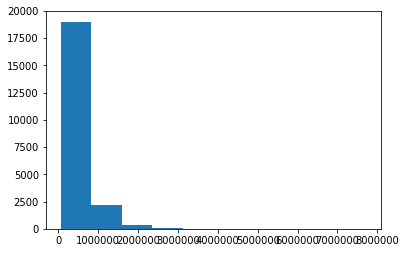

In [42]:
# Use plt.hist() to plot distribution of the price column

plt.hist(data.price)

[1.9021e+04 2.1480e+03 3.1600e+02 9.0000e+01 2.6000e+01 4.0000e+00
 4.0000e+00 1.0000e+00 1.0000e+00 2.0000e+00]
[  75000.  837500. 1600000. 2362500. 3125000. 3887500. 4650000. 5412500.
 6175000. 6937500. 7700000.]
<a list of 10 Patch objects>


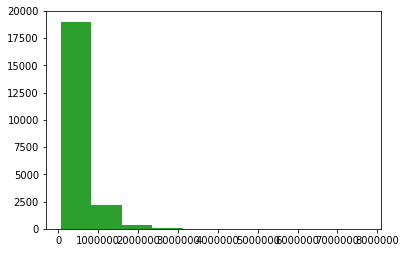

In [43]:
# Store returned arrays of plt.hist() to some variables

a = list(plt.hist(data.price))[0]

b = list(plt.hist(data.price))[1]

c = list(plt.hist(data.price))[2]

print(a)
print(b)
print(c)

(array([1.536e+03, 6.376e+03, 5.502e+03, 3.547e+03, 2.060e+03, 1.042e+03,
        4.280e+02, 3.120e+02, 2.260e+02, 1.400e+02, 1.260e+02, 7.800e+01,
        4.800e+01, 3.000e+01, 3.400e+01, 3.200e+01, 1.700e+01, 1.200e+01,
        1.500e+01, 1.400e+01, 6.000e+00, 1.000e+01, 1.000e+00, 6.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  75000.,  227500.,  380000.,  532500.,  685000.,  837500.,
         990000., 1142500., 1295000., 1447500., 1600000., 1752500.,
        1905000., 2057500., 2210000., 2362500., 2515000., 2667500.,
        2820000., 2972500., 3125000., 3277500., 3430000., 3582500.,
        3735000., 3887500., 4040000., 4192500., 4345000., 4497500.,
        4650000., 4802500., 4955000.

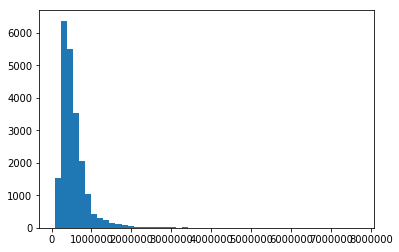

In [44]:
# Increase number of bins, plot histogram again

plt.hist(data.price, bins=50)

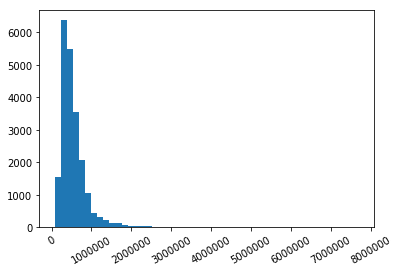

In [45]:
# Rotate xticks, plot a histogram

plt.hist(data.price, bins=50)
plt.xticks(rotation=30)

plt.show()

In [0]:
#About price distribution: the main part of all prices are concentrated around (0, 1000000), so-called Skewed to the left

### 7. Customize your plot

Plot is no good without a 
- Reasonable title
- Appropriately labeled x and y axis

Add them.

**Hint** most of customization is added via `plt.` e.g. 

```
plt.title('Title')
```

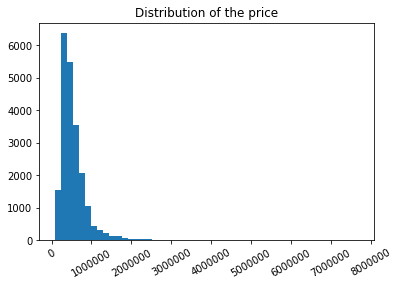

In [47]:
# add title to your histogram
plt.hist(data.price, bins=50)
plt.xticks(rotation=30)

plt.title('Distribution of the price')
plt.show()

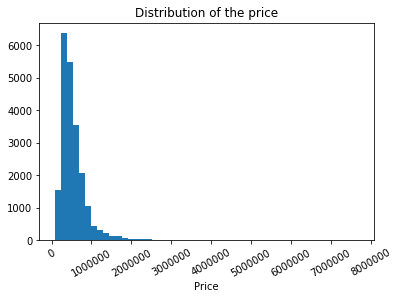

In [48]:
# Label your x axis

plt.hist(data.price, bins=50)
plt.xticks(rotation=30)

plt.title('Distribution of the price')
plt.xlabel('Price')
plt.show()

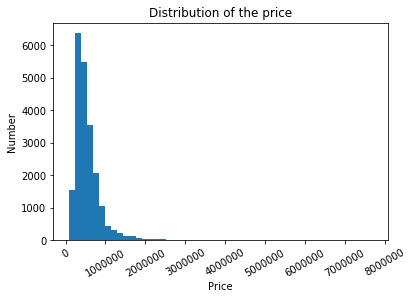

In [49]:
# Label your y axis

plt.hist(data.price, bins=50)
plt.xticks(rotation=30)

plt.title('Distribution of the price')
plt.xlabel('Price')
plt.ylabel('Number')
plt.show()

### 8. Plot a scatter plot

Based on a correlation table you decided to plot a scatter plot to check out dependency between price and its most correlated features.

- Choose a single most correlated with price feature.
- Plot a scatter plot (`plt.scatter()`) dependency between price and this feature.
- Label axis, add title.
- Elaborate on the picture.


In [50]:
# Choose a feature

corr_on_price_new = data.corrwith(data.price)

corr_on_price_dict_new = corr_on_price_new.to_dict()
corr_on_price_dict_new

{'bathrooms': 0.525137505413962,
 'bedrooms': 0.308349598145638,
 'condition': 0.03636178912899747,
 'day': -0.014670011075933324,
 'floors': 0.2567938875507184,
 'grade': 0.6674342560202365,
 'lat': 0.3070034799952186,
 'long': 0.02162624103930587,
 'month': -0.010080812107396264,
 'price': 0.9999999999999999,
 'sqft_above': 0.6055672983560781,
 'sqft_basement': 0.3238160207119833,
 'sqft_living': 0.7020350546118003,
 'sqft_living15': 0.5853789035795679,
 'sqft_lot': 0.08966086058710017,
 'sqft_lot15': 0.08244715251948599,
 'view': 0.39729348829450495,
 'waterfront': 0.26636943403060226,
 'weekday': -0.0016953217057156186,
 'year': 0.0035760408824667632,
 'yr_built': 0.05401153149479269,
 'yr_renovated': 0.12643379344089314}

In [51]:
corr_on_price_dict_new = removekey(corr_on_price_dict_new, 'price')
corr_on_price_dict_new

{'bathrooms': 0.525137505413962,
 'bedrooms': 0.308349598145638,
 'condition': 0.03636178912899747,
 'day': -0.014670011075933324,
 'floors': 0.2567938875507184,
 'grade': 0.6674342560202365,
 'lat': 0.3070034799952186,
 'long': 0.02162624103930587,
 'month': -0.010080812107396264,
 'sqft_above': 0.6055672983560781,
 'sqft_basement': 0.3238160207119833,
 'sqft_living': 0.7020350546118003,
 'sqft_living15': 0.5853789035795679,
 'sqft_lot': 0.08966086058710017,
 'sqft_lot15': 0.08244715251948599,
 'view': 0.39729348829450495,
 'waterfront': 0.26636943403060226,
 'weekday': -0.0016953217057156186,
 'year': 0.0035760408824667632,
 'yr_built': 0.05401153149479269,
 'yr_renovated': 0.12643379344089314}

In [52]:
#sort
import operator
sorted_dict = sorted(corr_on_price_dict_new.items(), key=operator.itemgetter(1))
sorted_dict

[('day', -0.014670011075933324),
 ('month', -0.010080812107396264),
 ('weekday', -0.0016953217057156186),
 ('year', 0.0035760408824667632),
 ('long', 0.02162624103930587),
 ('condition', 0.03636178912899747),
 ('yr_built', 0.05401153149479269),
 ('sqft_lot15', 0.08244715251948599),
 ('sqft_lot', 0.08966086058710017),
 ('yr_renovated', 0.12643379344089314),
 ('floors', 0.2567938875507184),
 ('waterfront', 0.26636943403060226),
 ('lat', 0.3070034799952186),
 ('bedrooms', 0.308349598145638),
 ('sqft_basement', 0.3238160207119833),
 ('view', 0.39729348829450495),
 ('bathrooms', 0.525137505413962),
 ('sqft_living15', 0.5853789035795679),
 ('sqft_above', 0.6055672983560781),
 ('grade', 0.6674342560202365),
 ('sqft_living', 0.7020350546118003)]

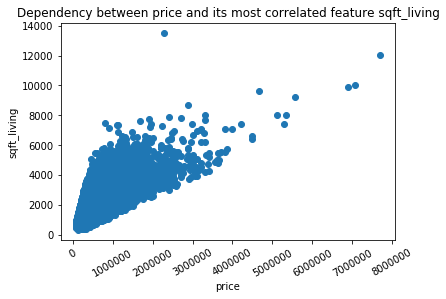

In [53]:
# Plot a scatter plot, dont forget to specify x,y label and a title

plt.scatter(data.price, data.sqft_living)
plt.xticks(rotation=30)

plt.title('Dependency between price and its most correlated feature sqft_living')
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.show()

In [0]:
#The main part of the points is densely concentrated in the price range (0, 4000000).
#the Graph shows that there are emissions that prevent adequate dependence, rational get rid of these emissions.

### 9. More data cleaning

Based on the histogram and scatter plot you decided to remove outliers,
for the purpose of our work removing top 1% (above 99th quantile),
would be enough.

- compute 99th **price** quantile
- remove all observations >= 99th **price** quantile

In [55]:
# compute price 99th quantile

price_99th_q = data.quantile(.99, axis = 0).price

price_99th_q

1964400.0000000051

In [56]:
# print number of rows in the data

data.shape

(21613, 22)

In [57]:
# trim the data to the price 99th quantile

condition = data.price < price_99th_q

data = data[condition]

data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day,weekday
id,,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10,13,0
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,9,1
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2,25,2
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12,9,1
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2,18,2
7237550310,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930,2014,5,12,0
1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819,2014,6,27,4
2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711,2015,1,15,3
2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113,2015,4,15,2


In [58]:
# [Graded] Compute number of rows and columns in your data after these operations

data_shape = data.shape

print(data_shape)

# your code here

(21396, 22)


In [0]:
# Grading

### 10. Customize scatter plot

Lets plot our scatter again, but now lets add some fancy stuff start with increasing the visual size of the plot:

- Increase figure size (check out `plt.figure()` parameters)
- Reduce size of individual scatter point to `5`
- Change color of the points to red 

**Hint 1** Check out plt.scatter() parameters

**Hint 2** You could also customize marker style, e.g. change points to triangles/squares or even small stars.

**Colors** https://matplotlib.org/2.0.2/api/colors_api.html

**Markers** https://matplotlib.org/3.1.1/api/markers_api.html

In [0]:
# Increase figure size


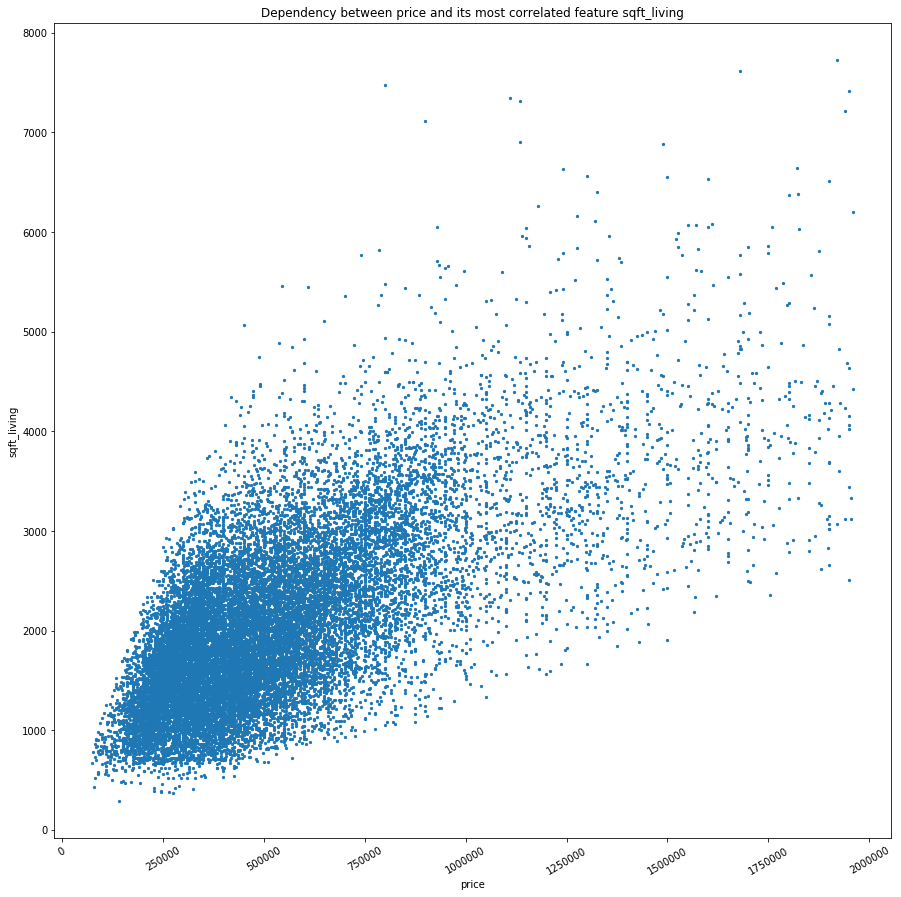

In [60]:
# Set marker size to 5
plt.figure(figsize=(15,15))
plt.scatter(data.price, data.sqft_living, s=5)
plt.xticks(rotation=30)

plt.title('Dependency between price and its most correlated feature sqft_living')
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.show()

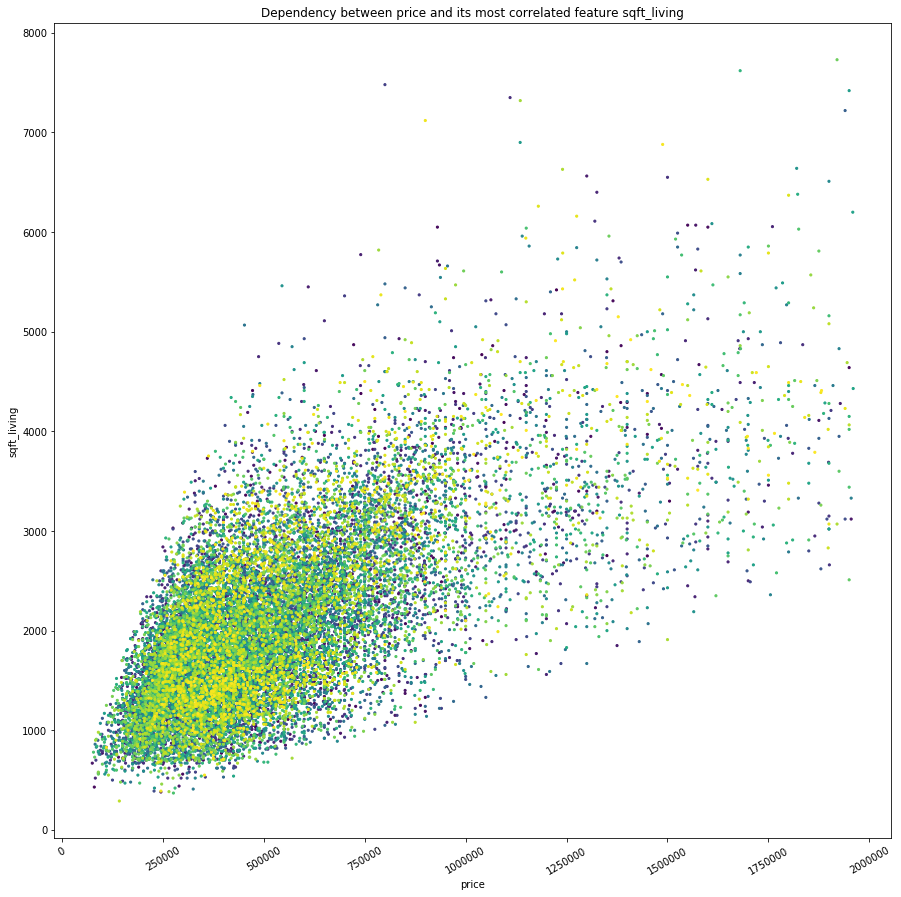

In [61]:
# Change points color
plt.figure(figsize=(15,15))
t = np.arange(21396)
plt.scatter(data.price, data.sqft_living, s=5, c=t, marker="8")
plt.xticks(rotation=30)

plt.title('Dependency between price and its most correlated feature sqft_living')
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.show()

### 11. More on color

You remebered that there were a `grade` feature also highly correlated with `price`, but unfortunatly 
qualitative. You have heard somewere that you could set points color using qualitive feature:
```
color = [1,1,1,0,0,0]
x = [0,1,2,3,4,5]
y = [0,1,2,3,4,5]
plt.scatter(x,y,c=color)
```

Original `grade` has too much variability. Create a new column that takes values:

- 1 if grade 1-3
- 2 if grade 4-7
- 3 if grade 8-10
- 4 if grade 11-13

and use it as color for previous scatter plot:

- Make a rough version of data.grade, add it as a new column to your data
- Plot a scatter plot with points colored according to your new column
- Use cmap option, of a plt.scatter()
- Explain what does cmap option controls
- Elaborate on the resulting picture

**Hint** check out pandas `map` or pandas `apply` function

**cmaps** https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [0]:
# [Graded] Create rough version of grade. Modify your existing `data` object by adding a new column

def change(a):
  
  if ((a > 0) & (a < 4)):
    return 1
  elif ((a > 3) & (a <8)):
    return 2
  elif ((a > 7) & (a < 11)):
    return 3
  elif ((a >10) & (a < 14)):
    return 4
  
data['rough_grade'] = data.grade.map(change)

In [63]:
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day,weekday,rough_grade
id,,,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10,13,0,2
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,9,1,2
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2,25,2,2
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12,9,1,2
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2,18,2,3
7237550310,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930,2014,5,12,0,4
1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819,2014,6,27,4,2
2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711,2015,1,15,3,2
2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113,2015,4,15,2,2


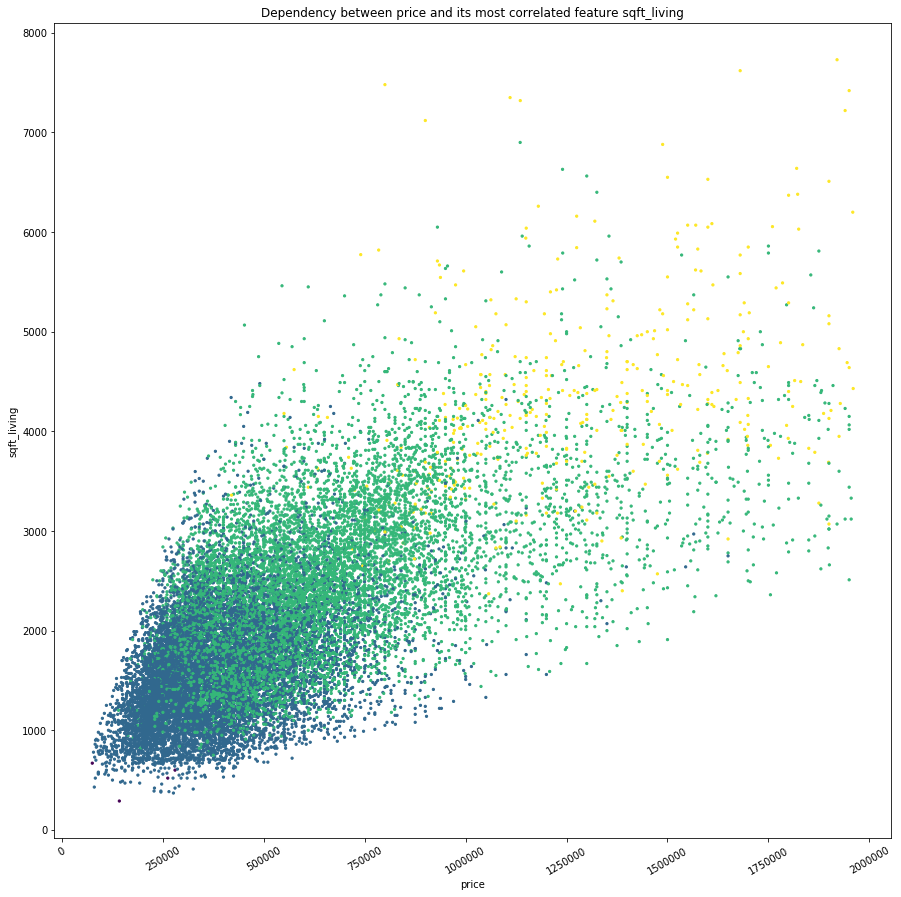

In [64]:
# Change points color according to a rough grade

plt.figure(figsize=(15,15))
plt.scatter(data.price, data.sqft_living, s=5, c=data.rough_grade)
plt.xticks(rotation=30)

plt.title('Dependency between price and its most correlated feature sqft_living')
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.show()

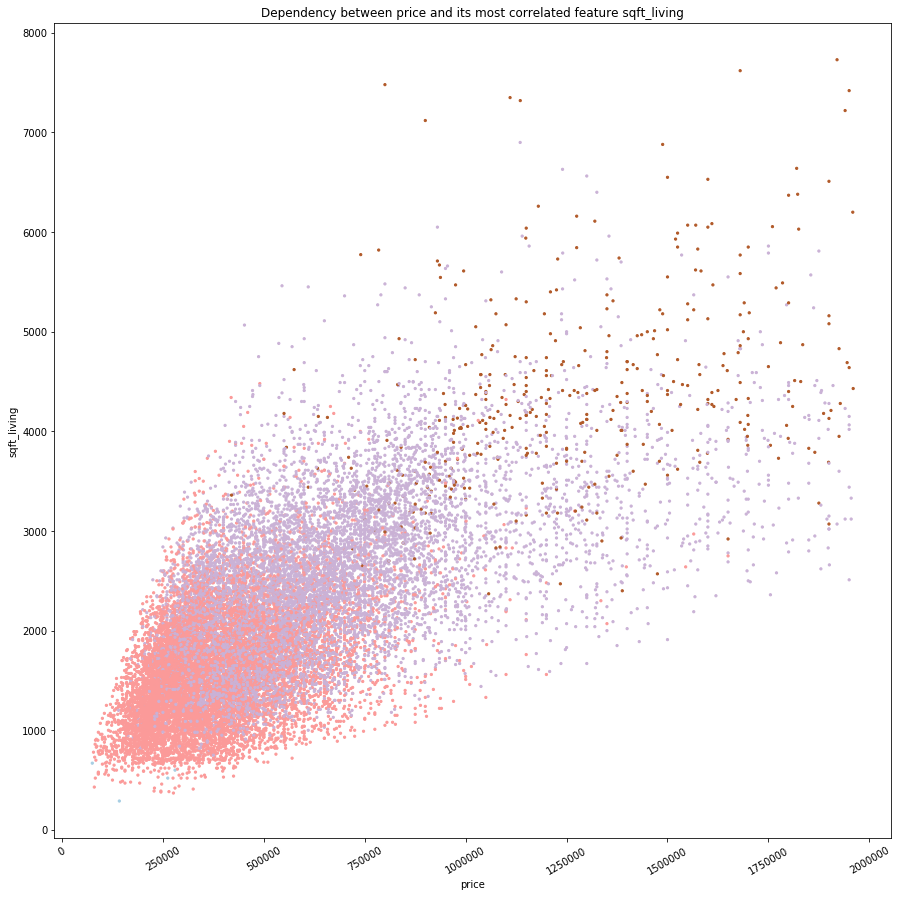

In [65]:
# Change cmap to Paired

plt.figure(figsize=(15,15))
plt.scatter(data.price, data.sqft_living, s=5, c=data.rough_grade, cmap = 'Paired')
plt.xticks(rotation=30)

plt.title('Dependency between price and its most correlated feature sqft_living')
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.show()

In [0]:
# Grading

In [0]:
#So we mentioned that our feature grade has strong correlation as well. But original grade has too much variability.
#And we decided to transoform and make it simple. 
#We add a new column rough grade and then apply it as a color according to every point it belongs.
#And now we can roughly distinguish also grade on our dependency price and sqft_living.
#and the cmap attribute allows us to change the gradient of the color distribution of rough_grade on this dependancy

# Seaborn

Seaborn is a wrap around matplotlib, along with pandas it allows you to build cleaner plots
much easier. 

But in the end it is just a wrap, if you want flexibility you need to go back to matplotlib.

Check their example gallery https://seaborn.pydata.org/examples/index.html it is awesome!

In [0]:
import seaborn as sns

### 12. Box plot

Lets switch to something else, number of bathroom sounds important to a price.
We could plot a boxplot of prices for every unique value of bathrooms.

And with `seaborn` we could do it in 1 single line!

- Plot a boxplot of prices for every unique value of bathrooms using seaborn.boxplot
- Increase figure size to make picture looks better
- Elaborate on the resulting picture

**Hint** check out seaborn documentation on boxplots https://seaborn.pydata.org/examples/grouped_boxplot.html

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

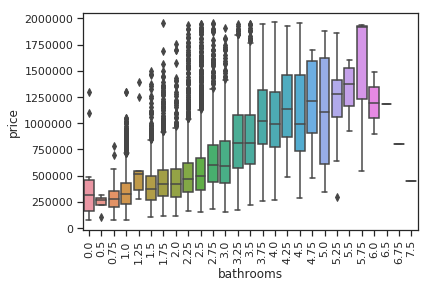

In [69]:
# Plot boxplots
sns.set(style="ticks")


sns.boxplot(x="bathrooms", y="price", data=data)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

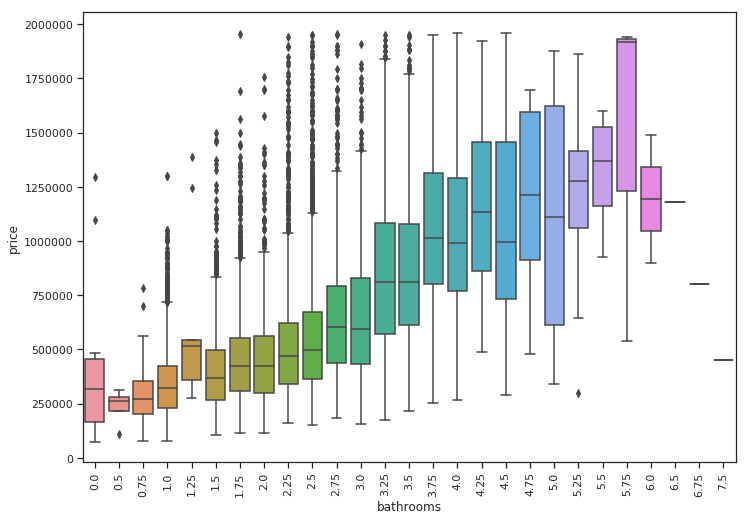

In [70]:
# Increase figure size
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set(style="ticks")

sns.boxplot(x="bathrooms", y="price", data=data)
plt.xticks(rotation='vertical')

In [0]:
#And as we understand price has a decent correlation on the number of bathrooms.
#The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution,
#except for points that are determined to be “outliers”.
#So now we can see "outliers" and can better understand distributions of price with respect to number of bathrooms,
#keeping in mind our outliers and the prices of the numbers of bathrooms where our data more than other concetrated

### 13. Bar chart

Waterfront is a rare feature, does it strongly affect price?

To answer this question you decided to plot `bar chart` of
price of houses with and without `waterfront`:

- Count number of houses **with** waterfront
- Plot seaborn categorical plot. Use this example https://seaborn.pydata.org/examples/grouped_barplot.html as a guide.
- Elaborate on the resulting picture.


In [72]:
# Count number houses with waterfront

data[data.waterfront!=0].count()

price            114
bedrooms         114
bathrooms        114
sqft_living      114
sqft_lot         114
floors           114
waterfront       114
view             114
condition        114
grade            114
sqft_above       114
sqft_basement    114
yr_built         114
yr_renovated     114
lat              114
long             114
sqft_living15    114
sqft_lot15       114
year             114
month            114
day              114
weekday          114
rough_grade      114
dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

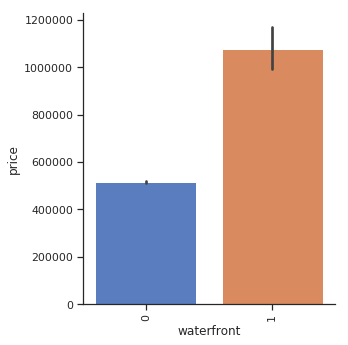

In [73]:
# plot the picture
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set(style="ticks", palette="pastel")

sns.catplot(x="waterfront", y = "price", 
            data=data,  kind="bar", palette="muted")
plt.xticks(rotation='vertical')

In [0]:
#We saw that the feature waterfront is really rare, but we was wondering whether it affect on price.
#And with Plot seaborn categorical plot we can say that Yes rather than no, because the price with waterfront
#is located in range (0,1100000), when  without waterfront in price-range (0, 500000)

### 14. Line plot

Remember your last time renting an apartments? When does it happen, summer? winter? Season could strongly affect

house prices. Lets check this out.

- Plot a line chart: price dependency on month
- Fix figure sizes if needed
- Fix xticks (set the to be `1..12`)
- Fix xticklabels to be actual month's names and not numbers (remember to rotate them) 
- When does the prices goes up?
- What is the best month to buy a house? (atleast in terms of general trend)
- Does this trend depend on view feature? Plot multiple lines on a single plot.
- Elaborate on the result



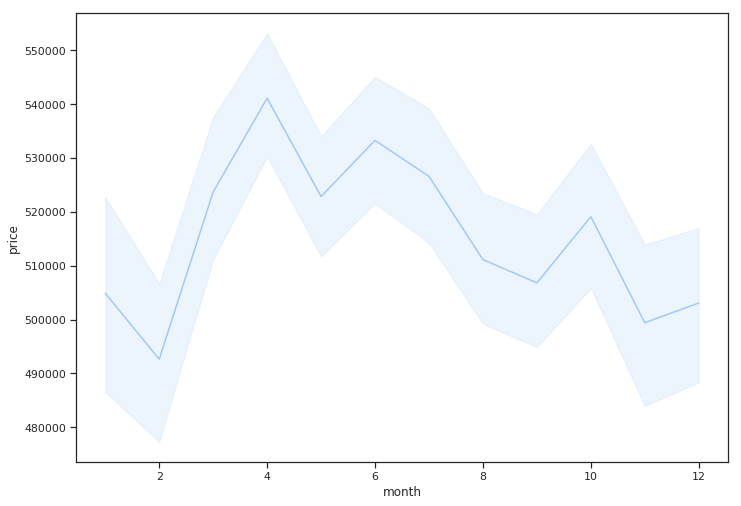

In [75]:
# Plot a line chart

ax = sns.lineplot(x="month", y="price", data=data)

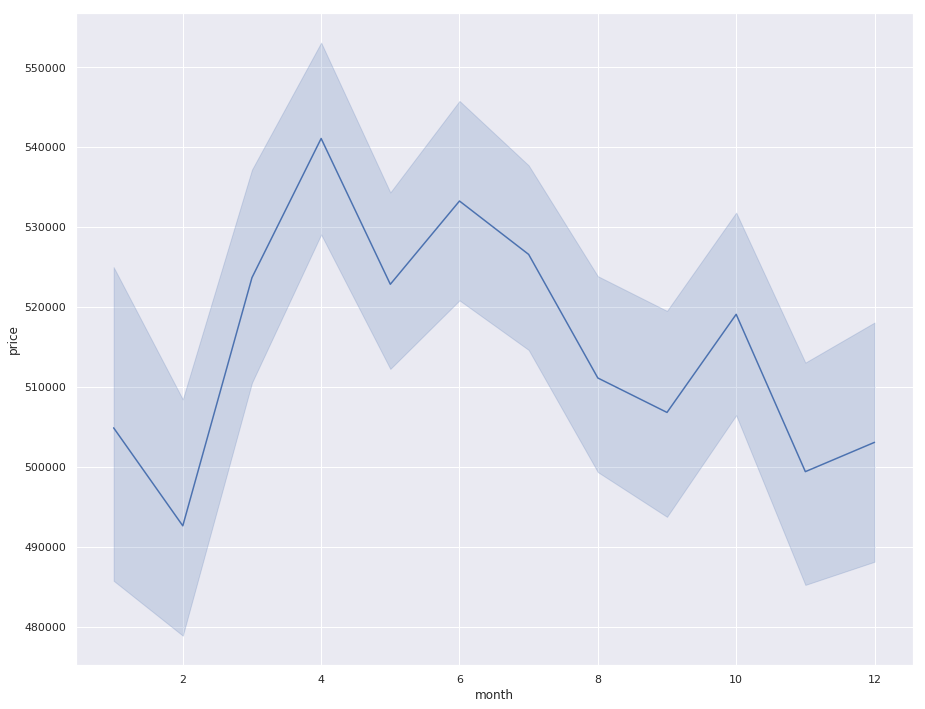

In [76]:
# Fix figure size

sns.set(rc={'figure.figsize':(15,12)})

ax = sns.lineplot(x="month", y="price", data=data)

In [0]:
# Fix xticks

# your code here

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

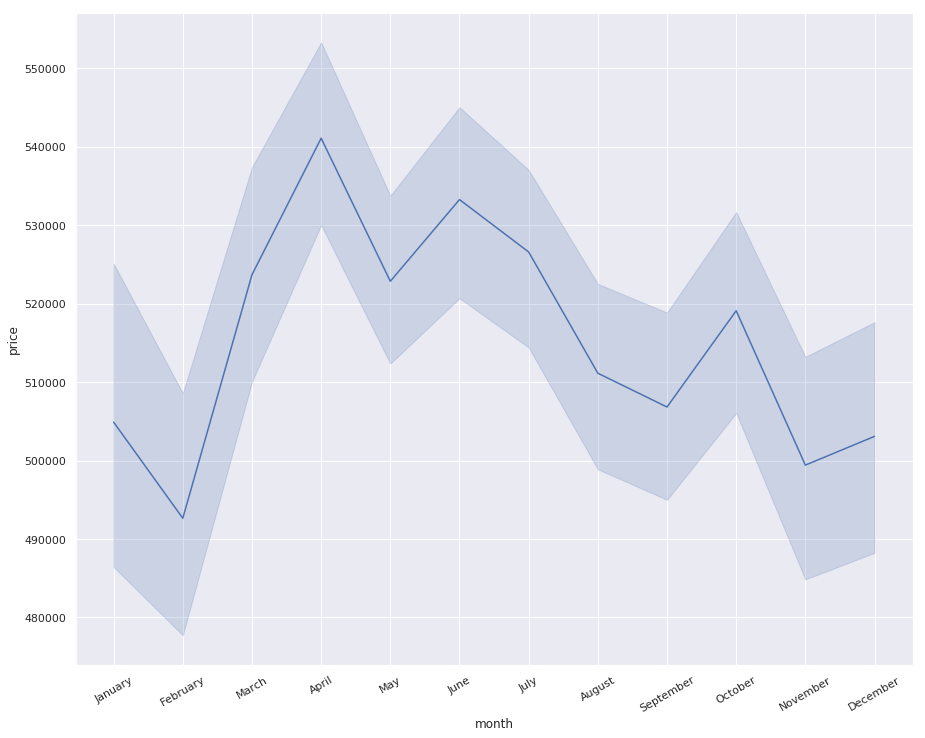

In [78]:
# Fix xticks labels

import calendar 

ax = sns.lineplot(x="month", y="price", data=data) 

months = list([calendar.month_name[x] for x in list(range(1,13))]) 

ax.set_xticks(list(range(1,13))) 

ax.set_xticklabels(months)

plt.xticks(rotation=30) 

In [79]:
# [Graded] What is the best month to buy a house?

best_month = 'February'

print(best_month)

February


In [0]:
# Grading


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

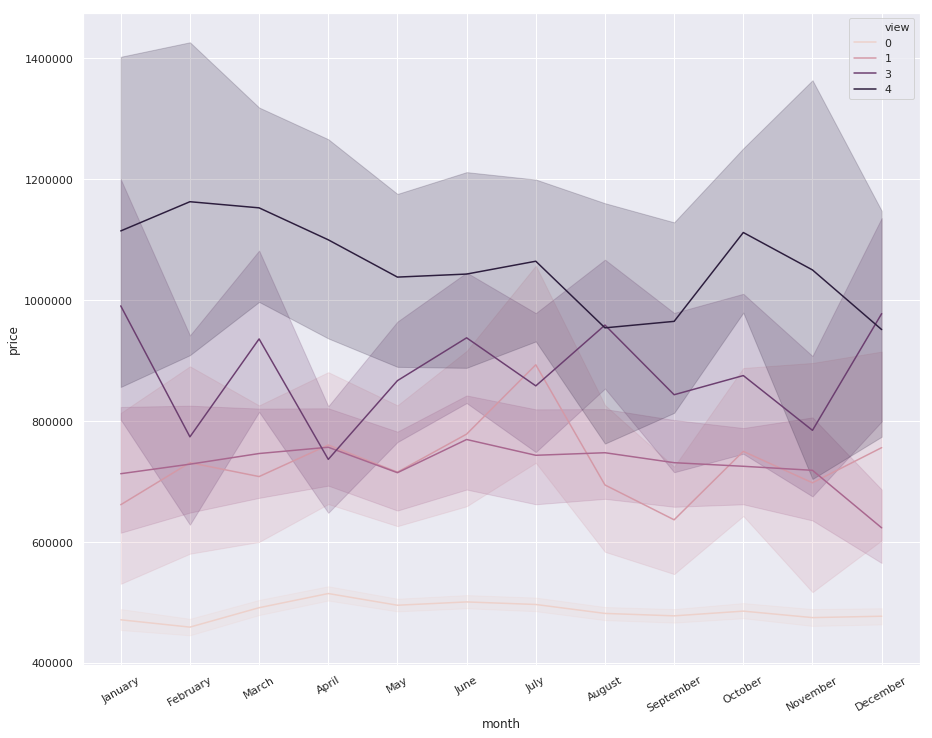

In [80]:
# Plot multiple lines on a single plot (view feature)

import calendar 

ax = sns.lineplot(x="month", y="price", hue = 'view', data=data) 

months = list([calendar.month_name[x] for x in list(range(1,13))]) 

ax.set_xticks(list(range(1,13))) 

ax.set_xticklabels(months)

plt.xticks(rotation=30) 

In [81]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day', 'weekday',
       'rough_grade'],
      dtype='object')

# Say no more, Machine Learning!

### 15. Prepare data from training machine learning models.
For this task we will try to predict the house price, so our target feature is `price`.

- Separate features and target.
- Split the data into train (`80%` of the data) and test (`20%` of the data). 
- Use random_state parameter = $42$.
- What does fixing random_state do?

In [0]:
# Separate features and the target (price)
y = data['price']
X = data.drop(['price'], axis=1)

In [0]:
# import train_test_split from sklearn model_selection submodule,
# split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Setting random_state a fixed value will guarantee that
#same sequence of random numbers are generated each time you run the code.

In [84]:
# [Graded] How many objects are in the training part of the data?

n_train = X_train.shape[0]

print(n_train)

17116


In [0]:
# Grading

### 16. Train your first model.

Since this is a regression task you decided that the Linear Regression will do the job:

- Create a Linear Regression class. Leave all parameters by default.
- Fit the model with the **training data**.
- Predict house prices of the **test data** (which were not seen by the model).
- Predict house prices of the **train data**.
- Report model perfomance in terms of `Mean Squared Error` on **train** and **test data**.
- Check metrics which compute relative error. Start with `R2 coefficient` on **train** and **test data.**

In [0]:
# make all imports
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [0]:
# Create a linear model

lr1 = LinearRegression()

In [88]:
# Train the linear model

lr1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Make predictions on train and test data

y_pred_train = lr1.predict(X_train)

y_pred_test = lr1.predict(X_test)

In [90]:
# [Graded] Report MSE of both train and test predictions

mse_lr_train = metrics.mean_squared_error(y_train, y_pred_train)
mse_lr_test = metrics.mean_squared_error(y_test, y_pred_test)

print('mse_lr_train:',mse_lr_train)
print('mse_lr_test:',mse_lr_test)

mse_lr_train: 23185745846.961823
mse_lr_test: 23455709505.449768


In [0]:
# Grading

In [92]:
# [Graded] Report R2 score of both train and test predictions

r2_score_train = metrics.r2_score(y_train, y_pred_train)
r2_score_test = metrics.r2_score(y_test, y_pred_test)

print('r2_score_train:',r2_score_train)
print('r2_score_test:',r2_score_test)

r2_score_train: 0.7149603559111752
r2_score_test: 0.7050739641158316


In [0]:
# Grading

### 17. Standardize your data.

You remebered that either Max or Mikhail told you, that for building a linear model **data normalization** is essential. But you completely forgot about it. Lets fix this.


> Standardization is a linear transformation that is applied to each feature independently.
First, mean $\hat{\mu_i}$ and variance $\hat{\sigma_i}$ of the $i$-th feature are estimated, after that we subtract the mean from every value and divide the result by variance:

$$\frac{x_{ij}-\hat{\mu_i}}{\hat{\sigma_i}}$$

>After that, each feature will have zero mean and variance of 1. This operation needs to be performed on the train data first, and then the same means and variances are to be used to modify the test set. This way we will not introduce any _leaks_ of information about the data in our test set.

Your goal is to Normalize (or Standartize) your data:

- Standartize your **train** data.
- Apply transformation to your **test** data.
- Fit the model again (using training data).
- Predict the housing prices on the **train** and **test data**.
- Does the scaling improve preformance?


In [0]:
# import a scaler
from sklearn.preprocessing import StandardScaler

In [0]:
# Standartize your train data

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)

In [0]:
# Apply the same transform on your test data

X_test_std = sc.transform(X_test)

In [97]:
# Fit the Linear model again on scaled data

lr2 = LinearRegression()

lr2.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
# [Graded] Make predictions

y_pred_train_std = lr2.predict(X_train_std)

y_pred_test_std = lr2.predict(X_test_std)

mse_lr_train_scaled = metrics.mean_squared_error(y_train, y_pred_train_std)
mse_lr_test_scaled = metrics.mean_squared_error(y_test, y_pred_test_std)

print('mse_lr_train_scaled:',mse_lr_train_scaled)
print('mse_lr_test_scaled:',mse_lr_test_scaled)

mse_lr_train_scaled: 23185745846.9618
mse_lr_test_scaled: 23455709505.452232


In [0]:
# Grading

In [0]:
#In this case scaling doesn't improve perfomance of our Linear Regression model

### 18. Diffent types of models and scaling.

Along with simple Linear Regression (Ordinary Least Squares), you have seen two additional algorithms that fit a linear refression model to the data:
- Ridge Regression
- Lasso Regression.

Lets see how they react to the scaling of the data.

- Fit separate Ridge and Lasso models on normalized data
- Compare their perfomances

To make your life easier you are suggested to write 2 functions:
 - `report_mse`
 - `evaluate_model`


In [0]:
def report_mse(model, X, y):
    """
    Reports MSE of the model on given data
    ---
    
    Parameters
    ---
    
    model - trained sklearn model
    
    X - array,
     (n_observations, n_features) matrix,
     used to predict target
    
    y - array,
     (n_observation, ) array of true target
     
    Returns
    ---
    
    mse - mean squared error
     between true target and predicted target
    """
    
    mse = 0
    
    y_pred = model.predict(X)
    
    mse = metrics.mean_squared_error(y, y_pred)
    
    return mse

In [0]:
def evaluate_model(model, X_train, y_train, X_test, y_test, scale=False):
    """
    Trains model on train and reports its perfomance
    on train and test data.
    ---
    
    Parameters
    ---
    
    model - sklearn regression model (not trained)
    
    X_train  - array,
     (n_observations_train, n_features) matrix,
     train data.
     
    y_train - array,
     (n_observation_train, ) array of train target
     
    X_test  - array,
     (n_observations_test, n_features) matrix,
     train data.
     
    y_test - array,
     (n_observation_test, ) array of test target
     
    scale - bool,
     whether to scale the data before training,
     default False
     
    
    Returns
    ---
    
    mse_train - float,
     mean squared error of the train prediction
     
    mse_test - float,
     mean squared error of the test prediction
    """
    
    mse_train = 0
    mse_test = 0
    
    if (scale == True):
      
      sc = StandardScaler()

      X_train = sc.fit_transform(X_train)
      
      X_test = sc.transform(X_test)
    
    model.fit(X_train, y_train)
  
    mse_train = report_mse(model, X_train, y_train)

    mse_test = report_mse(model, X_test, y_test)
    
    return mse_train, mse_test

In [0]:
# make imports
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics

In [104]:
# [Graded] fit Ridge regression model on scaled data and evaluate it

rr = Ridge(alpha=10000)

evaluate1 = evaluate_model(rr, X_train, y_train, X_test, y_test, scale=True)

mse_ridge_train_scaled = evaluate1[0]
mse_ridge_test_scaled = evaluate1[1]


print('mse_ridge_train_scaled:',mse_ridge_train_scaled)
print('mse_ridge_test_scaled:',mse_ridge_test_scaled)

mse_ridge_train_scaled: 26298388716.857494
mse_ridge_test_scaled: 26569136446.10622


In [0]:
# your code here

In [106]:
# [Graded] fit Lasso regression model on scaled data and evaluate it

lr = Lasso(alpha=10000)

evaluate2 = evaluate_model(lr, X_train, y_train, X_test, y_test, scale=True)


mse_lasso_train = evaluate2[0]
mse_lasso_test = evaluate2[1]

print('mse_lasso_train:',mse_lasso_train)
print('mse_lasso_test:',mse_lasso_test)

mse_lasso_train: 24405352879.507496
mse_lasso_test: 24790057082.538094


In [0]:
# Grading

In [0]:
#So after our results demonstrate that Linear Regression model perfom better than our Ridge and Lasso Regression models
#with alpha = 10000
#the second place took Lasso Regression model, it shows better result compared with Ridge Regression model

### 19. Analyzing trained models.

You decided to look inside your regressor and try to interpret the obtained coefficients. It is not always easy with machine learning models, but linear models provide easy explanations: the bigger the coefficient before a feature the bigger the importance of this feature for the prediction.

> Coefficients of the linear model are easily interpretable:
$$
y = \theta_1 x + \theta_0
$$
> Increasing $x$ by $1$, will increase $y$ by $\theta_1$


- Examine coefficients of the trained Linear Regression model on original data. Plot a horizontal bar chart of feature importance. Customize a plot appropriatly.
- What are the three largest coefficients by absolute value? What features do they correspond to?
- Repeat these steps on normalized data
- Compare the results.


<BarContainer object of 22 artists>

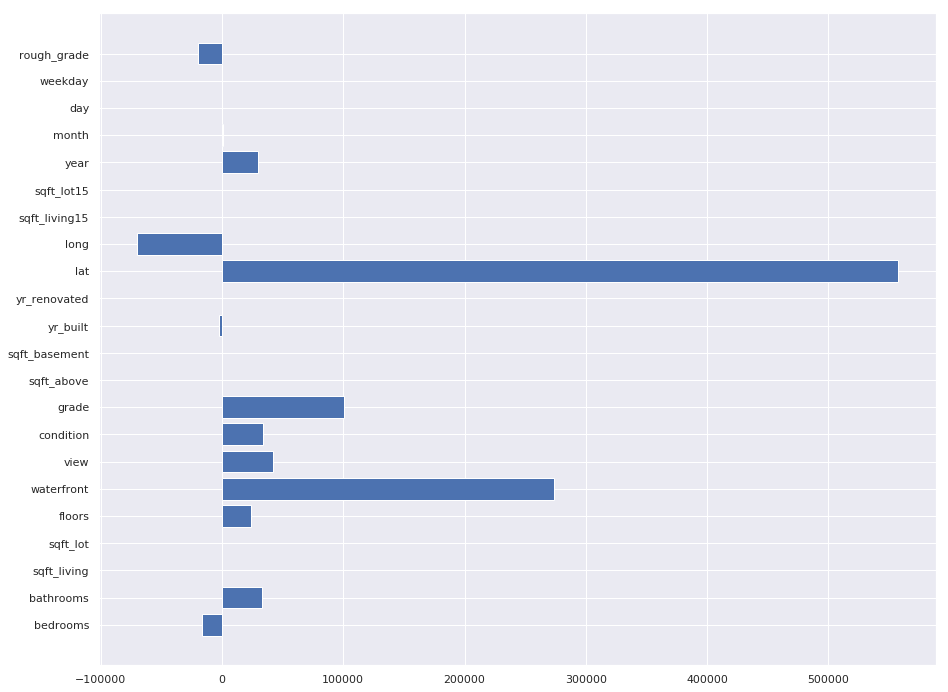

In [109]:
# You should already have trained linear model on unnormalized data
# Plot a bar chart of feature importances

plt.barh(X.columns, lr1.coef_)

In [110]:
# [Graded] Print names of 3 largest coefficients by magnitude
# You might want to write a function for it
# to use it in the future

def max_coef(model, names, k=3):
    """
    Return k biggest coefficients of a linear model
    ---
    
    Parameters
    ---
    
    model - trained linear model
    
    names - array-like,
     list of feature names
     
    k - int,
     number of features to return
     
    Returns
    ---
    
    top_k_features - dict,
     key - feature name
     value - corresponding coefficient magnitude
    """
    # Your code goes here
    # Hint: use np.argsort, check the returned order!
    ...
    ans = {}
    
    for i in (np.argsort(np.absolute(model.coef_))[-k:]):
      
      ans[names[i]] = model.coef_[i]
    
    return ans

max_coef_names = max_coef(lr1, X.columns)
print(max_coef_names)

{'grade': 100563.69681607907, 'waterfront': 273340.37338861724, 'lat': 557056.0330046316}


In [0]:
# Grading

<BarContainer object of 22 artists>

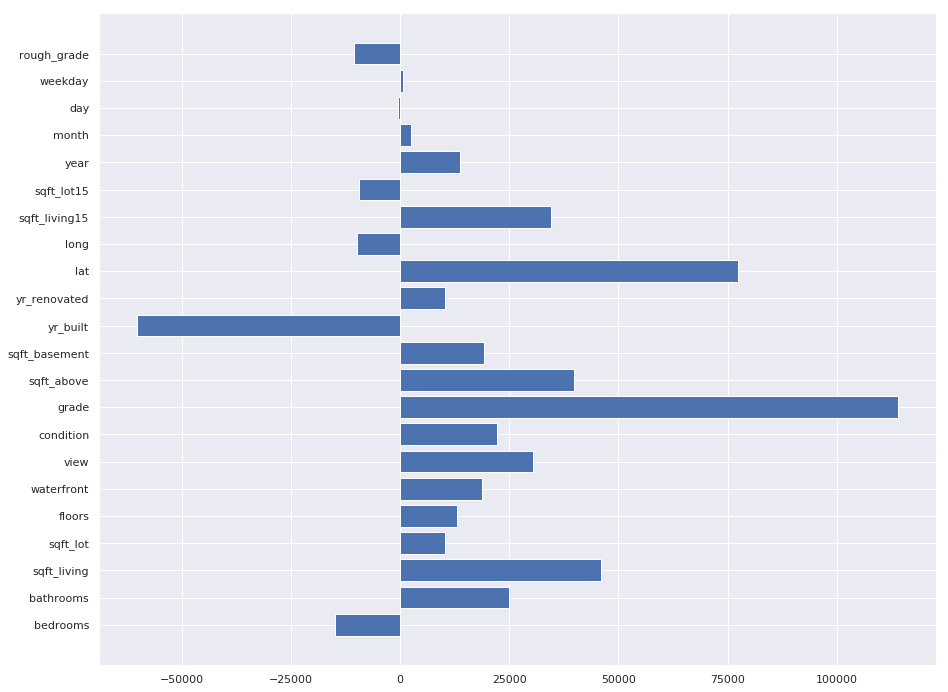

In [112]:
# You should already have trained linear model on normalized data
# Plot a bar chart of feature importances

plt.barh(X.columns, lr2.coef_)

In [113]:
# [Graded] This time, find 3 largest coefficients by magnitude for the model trained on the *scaled* data

max_coef_names_scaled = max_coef(lr2, X.columns)
print(max_coef_names_scaled)

{'yr_built': -60384.088176798505, 'lat': 77296.6609317359, 'grade': 113992.68586217004}


In [0]:
# Grading

In [0]:
#The 3 largest coefficients by magnitude for the model trained on the scaled data is different with 
#The 3 largest coefficients by magnitude for the model trained on non-scaled data, but lat and grade are in both cases

### 20. Explore effects of regularization on the coefficients.

Your goal is to compare how Ridge and Lasso affects model coefficients. 


- Fit **Ridge Regression** and **Lasso models** on the **scaled train data**, using parameter $\alpha = 10^4$.
- What does parameter $\alpha$ stands for? (in **Lasso** and **Ridge**) 
- Report three largest coefficients (by absolute value) for each model.
- What features do they correspond to? 
- Are they different from what we got from the simple **Linear Regression** earlier?
    - Compare coeficients magnitude (plot a bar plot)
    
- How many non-zero coefficients are there in the trained **Lasso** and **Ridge** models?

In [0]:
# Fit the models

# your code here

In [117]:
# [Graded] Report three largest coefficients of the Ridge

answer_21_1_max_c_ridge = max_coef(rr, X.columns)

print(answer_21_1_max_c_ridge)

{'sqft_living': 39752.35025368932, 'grade': 50235.67386208595, 'lat': 54431.38589653063}


In [0]:
# Grading

In [119]:
# [Graded] Report  three largest coefficients of the Lasso

answer_21_2_max_c_lasso = max_coef(lr, X.columns)

print(answer_21_2_max_c_lasso)

{'lat': 72015.1695950932, 'sqft_living': 86865.82130233904, 'grade': 104943.33400715036}


In [0]:
# Grading

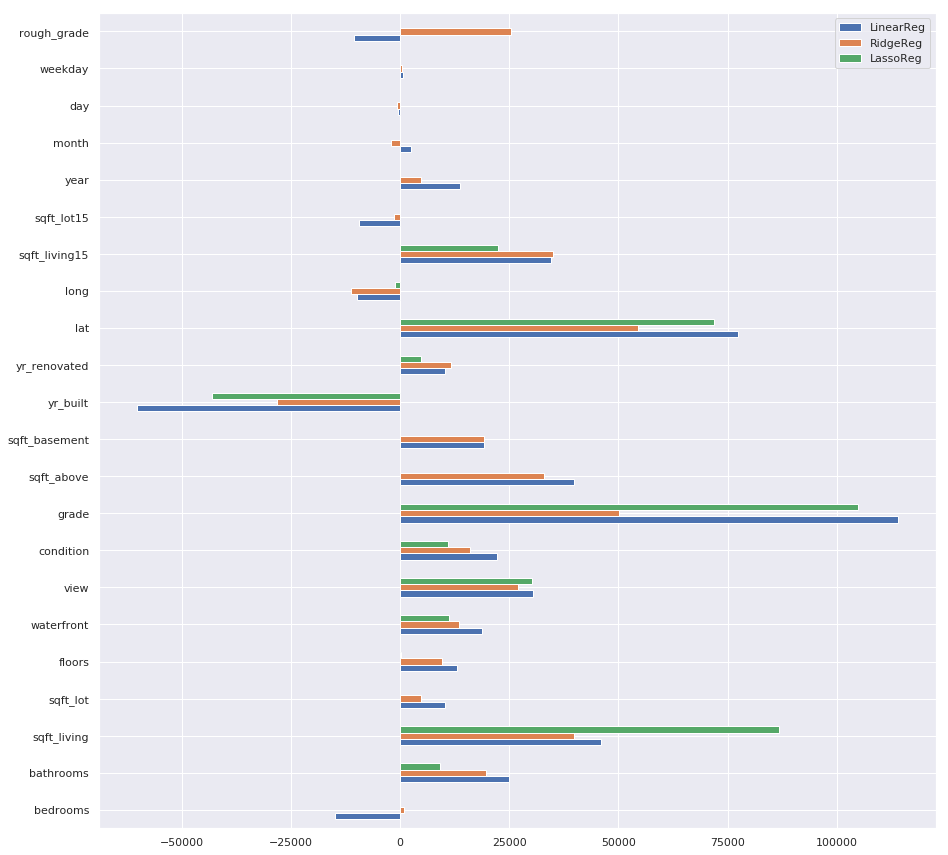

In [121]:
# Compare the results between them and with 
# vanilla Linear Regression results trained earlier

index = list(X.columns)

df = pd.DataFrame({'LinearReg': lr2.coef_, 'RidgeReg': rr.coef_, 'LassoReg': lr.coef_}, index=index)

df.plot.barh(figsize=(15,15))

In [122]:
# [Graded] How many non-zero coefficients are there in the trained Lasso and Ridge models?

answer_21_3_nz_ridge = np.count_nonzero(rr.coef_)
answer_21_4_nz_lasso = np.count_nonzero(lr.coef_)

print(answer_21_3_nz_ridge)
print(answer_21_4_nz_lasso)

22
13


In [0]:
# Grading

In [0]:
#As the result, we have 22 non-zero coefficients in Ridge and 13 non-zero coefficients in Lasso

### 21. Try a diffent type of model.

Linear is not the only regression model, you could succesfully solve regression problems using our old friend K nearest neighbours.

- Import K Nearest Neoghbors regression model.
- Fit it with train data. Use $k=7$ number of neighbors for your model.
- Report model perfomance on train and test data, which is better, why?
- Do you need to normalize the data for KNN model?
- Elaborate on the result.


**Hint** https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [0]:
# make imports

from sklearn.neighbors import KNeighborsRegressor

In [0]:
# train the model

KNN1 = KNeighborsRegressor(n_neighbors=7)
KNN2 = KNeighborsRegressor(n_neighbors=7)

In [127]:
# Report KNN perfomance

report_KNN = evaluate_model(KNN1, X_train, y_train, X_test, y_test, scale=False)

mse_KNN_train = report_KNN[0]
mse_KNN_test = report_KNN[1]

print("mse_KNN_train:",mse_KNN_train)
print("mse_KNN_test:",mse_KNN_test)

report_KNN_scaled = evaluate_model(KNN2, X_train, y_train, X_test, y_test, scale=True)

mse_KNN_train_scaled = report_KNN_scaled[0]
mse_KNN_test_scaled = report_KNN_scaled[1]

print("mse_KNN_train_scaled:",mse_KNN_train_scaled)
print("mse_KNN_test_scaled:",mse_KNN_test_scaled)



mse_KNN_train: 30639843946.872444
mse_KNN_test: 41103828851.3888
mse_KNN_train_scaled: 14917574689.89016
mse_KNN_test_scaled: 20604373234.423958


In [0]:
# Have you used normalized or unnormalized data, why?


# I used normalized data. The reason is following:
# The k-nearest neighbor algorithm relies on majority voting
# based on class membership of 'k' nearest samples for a given test point.
# The nearness of samples is typically based on Euclidean distance.
# Without normalization, all the nearest neighbors are aligned in the direction of the axis with the smaller range,
# leading to incorrect classification.
# Normalization solves this problem! And the result we see in the cell above.



#the source is 'https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn'

In [0]:
# Elaborate on the result, how it is compare to linear models?


# In comparison with linear models this particular case with K=7 perfom much better than liner models. 
# And it is worth saying that on non-scaled data the result is worse than linear models, but as mentioned above, 
# it is not correct to apply KNN on such data. We have to apply it on scaled data.

### 22. Cross-Validation. 

You have heard that using so-called **k-fold** procedure is a good idea:

- Estimate performance of Linear Regression and K Nearest Neighbors using **3-fold** cross-validation on **training data**.
- How do the CV-scores compare to the scores on the **test set** that we have obtained previously? 

> When the score estimates obtained using train data only (like the CV score here) are better than on the hold out set, we say that they are _optimistic_. Conversly, if they are lower - _pessimistic_. This terminology stems from the principle that the hold-out set provides the most reasonable estimate of the model's performance on the new data.

>So the idea is the following:
>- Divide data into **train** and **test** (hold-out) parts
>- Using k-fold procedure on **train** set choose model parameters (such as k in KNN, or $\alpha$ in Ridge and Lasso)
>- Estimate model perfomance using **test** set.


In [0]:
# make imports

from sklearn.model_selection import cross_val_score, KFold

In [0]:
lr_cv = LinearRegression()

kfold = KFold(n_splits=3, random_state = 42) # 3-fold CV
cv = kfold.split(X_train_std, y_train) # show data & make the split

cv_scores = cross_val_score(lr_cv, X_train_std, y_train, scoring= 'neg_mean_squared_error', cv=cv)

In [132]:
# [Graded] Estimate performance of Linear Regression 3 fold CV on train data

answer_22_1_mse_lr_cv = -np.mean(cv_scores)

print(answer_22_1_mse_lr_cv)

23269781902.485977


In [0]:
# Grading

In [134]:
# [Graded] Compare CV perfomance of the linear model with perfomance on test

lr_cv_test = evaluate_model(lr_cv, X_train, y_train, X_test, y_test, scale=True)

answer_22_2_mse_lr_test = lr_cv_test[1]

print(answer_22_2_mse_lr_test)

23455709505.452232


In [0]:
# Grading

In [136]:
# [Graded] Estimate performance of KNN 3 fold CV on train data


knn_cv = KNeighborsRegressor()

kfold = KFold(n_splits=3, random_state = 42) # 3-fold CV
cv = kfold.split(X_train_std, y_train) # show data & make the split

cv_scores = cross_val_score(knn_cv, X_train_std, y_train, scoring= 'neg_mean_squared_error', cv=cv)



answer_22_3_knn_cv = -np.mean(cv_scores)

print(answer_22_3_knn_cv)

21374831421.830147


In [0]:
# Grading

In [138]:
# [Graded] Compare CV perfomance of the KNN model with perfomance on test

knn_cv_test = evaluate_model(knn_cv, X_train, y_train, X_test, y_test, scale=True)

answer_22_4_knn_test = knn_cv_test[1]

print(answer_22_4_knn_test)

21340183551.26242


In [0]:
# Grading

In [0]:
# CV perfomance of the KNN model is a bit less than the perfomance of KNN model on test

### 23. Tuning hyperparameters with cross-validation.

>You might have already noticed that some parameters of the machine learning algorithm are set beforehand (like number of neighbors in KNN), while others are determined during traing (linear regression weights). The first type of parameters apply to the training process itself and, thus, indirectly influence the second type.
How to select values for them then? Since these parameters are defined before traing, fixed test set some values might work better for the than the others. One of the approaches to setting hyper-parameters is to use cross-validation. Using cross-validation we can get an estimate of the performance for the given cofiguration of the hyper-parameters eithout peeking at the test set. What's left is to consider a set of possible hyper-parameters settings and try them one-by-one, calculating the CV-score. We then select the configuration that performed best, train a model with these hyper-parameters on the full train data and calculate the final score on the test set.


Your task is to find the best value of hyper-parameter $k$ for K Nearest Neighbors algorithm.

- Use 3-fold cross-validation and a **range** $[3, 15]$ for the possible values of $k$.
- Plot a dependency between **k** and **MSE** score.
- Train KNN with best **k** on the whole **train**, predict on **test** and estimate the perfomance.
- Compare **test** MSE score with **CV** MSE score
- Elaborate on the results


In [141]:
# [Graded] use GridSearchCV to evalute KNN perfomance with different k

from sklearn.model_selection import GridSearchCV

kfold = KFold(n_splits=3, random_state = 42) # 3-fold CV
cv = kfold.split(X_train_std, y_train) # show data & make the split

#create a new KNN model
knn2 = KNeighborsRegressor()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(3, 16)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, scoring = 'neg_mean_squared_error', n_jobs = -1, cv=cv)

#fit model to data
knn_gscv.fit(X_train_std, y_train)

print(knn_gscv.best_params_)

print(-knn_gscv.best_score_)

answer_23_1_k = knn_gscv.best_params_['n_neighbors']

print(answer_23_1_k)

{'n_neighbors': 11}
20484146047.116295
11


In [0]:
# Grading

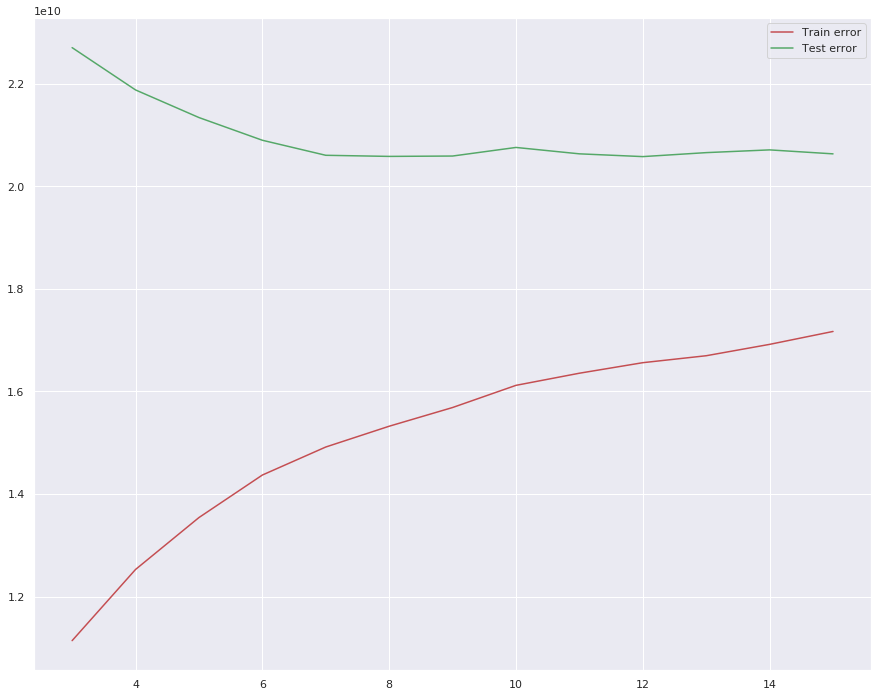

In [143]:
# Plot the dependensy figure

#From Lecture 3
k_range = [i for i in range(3,16)]

errors_train = []
errors_test = []

for k in k_range:
  model = KNeighborsRegressor(n_neighbors = k)
  errors_train.append(evaluate_model(model, X_train, y_train, X_test, y_test, scale=True)[0])
  errors_test.append(evaluate_model(model, X_train, y_train, X_test, y_test, scale=True)[1])

plt.plot(k_range, errors_train, 'r', label = 'Train error')
plt.plot(k_range, errors_test, 'g', label = 'Test error')
plt.legend()

In [144]:
# [Graded] Evalute best model on test set

knn_best_model = KNeighborsRegressor(n_neighbors = 11)

evaluate_best_model = evaluate_model(knn_best_model, X_train, y_train, X_test, y_test, scale=True)



answer_23_2_mse = evaluate_best_model[1]

print(answer_23_2_mse)

20632700146.11605


In [0]:
# Grading

In [159]:
# Compare the test results with CV MSE score


print('CV MSE score:', -(cross_val_score(knn_best_model,X_train_std,y_train,cv=3,scoring='neg_mean_squared_error').mean()))

print('the best model on test set:', answer_23_2_mse)

CV MSE score: 20484110519.680073
the best model on test set: 20632700146.11605


### 24. Tuning regularization parameters with cross-validation.

You decided to tune parameters of your linear models, just as you tune KNN parameter.

> If you look at `sklearn.linear_model` module, you will find `RidgeCV` and `LassoCV` classes. They implement cross-validation on the training data in their `fit` method, so you just need to specify the search domain for $\alpha$ and the scoring rule. Everithing else is done under the hood. After you trained the model, the best value for $\alpha$ will be stored in the `alpha_` attribute of the estimator.


- Find the best regularization parameter for Ridge Regression and Lasso using this method.
- Use $\{10^{-6}, 10^{-5}, ... , 1, 10, ... , 10^6\}$ as possible values for $\alpha$.
- How does the performance of the best models on CV compare to their perfomance on test set?
- Plot a scatter plot of y_pred vs y_true on a test set for Lasso model.
- Elaborate on the result. Does your model overstimate the house prices or understimate them?


In [0]:
# make imports

from sklearn.linear_model import RidgeCV, LassoCV

In [147]:
# [Graded] Fit a Ridge model, what is best alpha score?

kfold = KFold(n_splits=3, random_state = 42) # 3-fold CV
cv = kfold.split(X_train_std, y_train) # show data & make the split

rrcv = RidgeCV(alphas=[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6], scoring = 'neg_mean_squared_error', cv=cv)

rrcv.fit(X_train_std, y_train)

print(rrcv.score(X_train_std, y_train))

answer_24_1_ridge_a = rrcv.alpha_
answer_24_2_mse_ridge_best = report_mse(rrcv, X_train_std, y_train)

print('Best alpha:',answer_24_1_ridge_a)
print('Best alpha score:',answer_24_2_mse_ridge_best)

0.7149600151760973
Best alpha: 10.0
Best alpha score: 23185773563.09564


In [0]:
# Grading

In [0]:
# Grading

In [150]:
# [Graded] Fit a Lasso model, what is best alpha score?

kfold = KFold(n_splits=3, random_state = 42) # 3-fold CV
cv = kfold.split(X_train_std, y_train) # show data & make the split

lrcv = LassoCV(alphas=[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6], cv=cv )
lrcv.fit(X_train_std, y_train)

print(lrcv.score(X_train_std, y_train))

answer_24_3_lasso_a = lrcv.alpha_
answer_24_4_mse_lasso_best = report_mse(lrcv, X_train_std,y_train)

print('Best alpha:', answer_24_3_lasso_a)
print('Best alpha score:',answer_24_4_mse_lasso_best )

0.7149546545366334
Best alpha: 100.0
Best alpha score: 23186209609.192253


In [0]:
# Grading

In [0]:
# Grading

In [153]:
# Compare best Ridge model perfomance on CV and on a test set

kfold = KFold(n_splits=3, random_state = 42) # 3-fold CV
cv = kfold.split(X_train_std, y_train) # show data & make the split

print('best Ridge model perfomance on CV:', -np.mean(cross_val_score(Ridge(alpha=answer_24_1_ridge_a), X_train_std, y_train, scoring= 'neg_mean_squared_error', cv=cv)))

print('best Ridge model perfomance on a test set:', evaluate_model(Ridge(alpha=answer_24_1_ridge_a), X_train, y_train, X_test, y_test, scale =True)[1])

best Ridge model perfomance on CV: 23269617340.821564
best Ridge model perfomance on a test set: 23455361048.508198


In [154]:
# Compare best Lasso model perfomance on CV and on a test set
kfold = KFold(n_splits=3, random_state = 42) # 3-fold CV
cv = kfold.split(X_train_std, y_train) # show data & make the split

print('best Lasso model perfomance on CV:', -np.mean(cross_val_score(Lasso(alpha=answer_24_3_lasso_a), X_train_std, y_train, scoring= 'neg_mean_squared_error', cv=cv)))

print('best Lasso model perfomance on a test set:', evaluate_model(Lasso(alpha=answer_24_3_lasso_a), X_train, y_train, X_test, y_test, scale = True)[1])

best Lasso model perfomance on CV: 23268696906.18816
best Lasso model perfomance on a test set: 23453400785.465084


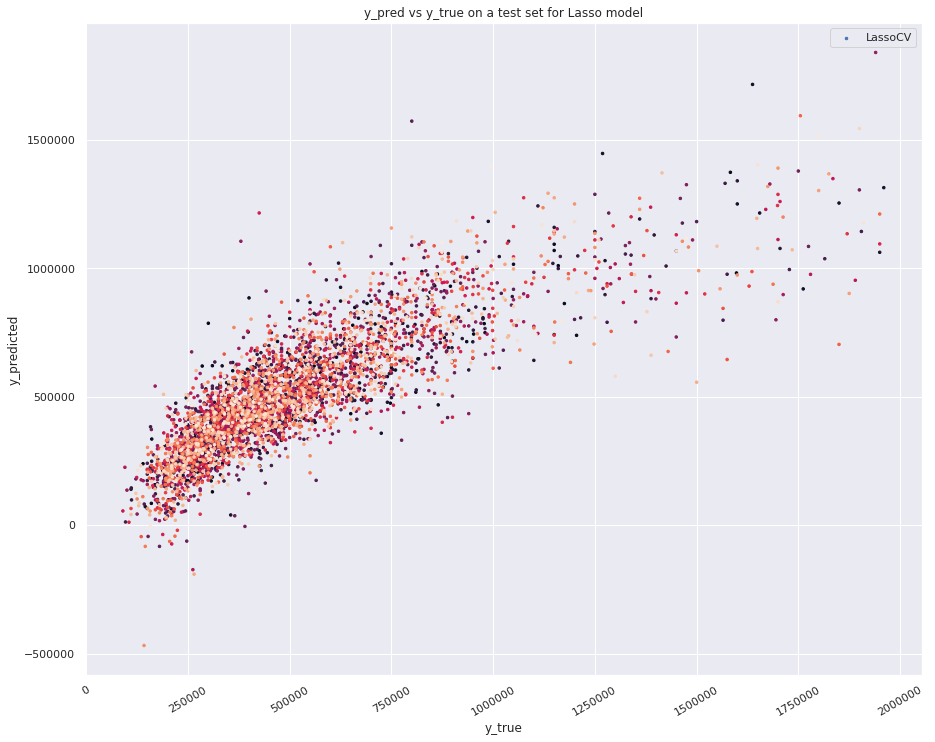

In [155]:
# Plot a scatter plot plt.scatter(y_true, y_predicted) for test observations

p = np.arange(4280)
plt.scatter(y_test, lrcv.predict(X_test_std), label = 'LassoCV', s=7, c=p, marker="8")
plt.title('y_pred vs y_true on a test set for Lasso model')
plt.xlabel('y_true')
plt.ylabel('y_predicted')
plt.xticks(rotation = 30)

plt.legend()


    

In [0]:
# In my opinion, the model is underfitted, despite the good and close concentration of points in the left half of the chart,
# so we have a small number of points, the price of which is negative, and also shows a large spread of points 
# (big variance), which is the discrepancy between the predicted price and the present one.

# Analyzing the graph also clearly shows that the model underestimates the price of houses,
# which shows the right part of the chart with a spread of points.